# Pre-processing Overlay data for WaDE upload.
- Purpose: To preprocess state overlay data into one main file for simple DataFrame creation and extraction.

In [1]:
# Needed Libraries / Modules

# ---- working with data ----
import os  # native operating system interaction
import numpy as np  # mathematical array manipulation
import pandas as pd  # data structure and data analysis
import geopandas as gpd  # geo-data structure and data analysis

# ---- visualization ----
import matplotlib.pyplot as plt  # plotting library
import seaborn as sns  # plotting library

# ---- API data retrieval ----
import requests  # http requests
import json  # JSON parse

# ---- Cleanup ----
import re  # string regular expression manipulation
from datetime import datetime  # date and time manipulation
pd.set_option('display.max_columns', 999)  # How to display all columns of a Pandas DataFrame in Jupyter Notebook
pd.set_option('display.float_format', lambda x: '%.5f' % x)  # suppress scientific notation in Pandas

In [2]:
# ---- working directory ----
workingDirString = "G:/Shared drives/WaDE Data/WaDE Data Folder/Nebraska/Overlays" # set working directory folder string here
os.chdir(workingDirString)
print(f'The working Directory is:', workingDirString)

The working Directory is: G:/Shared drives/WaDE Data/WaDE Data Folder/Nebraska/Overlays


## Overlay Area Data #1

In [3]:
# Input File
inputFile = "RawInputData/shapefiles/Natural_Resource_District_NRD_Boundaries_20250129.zip"
dfin1 = gpd.read_file(inputFile).replace(np.nan, "")
dfin1['geometry'] = dfin1['geometry'].to_crs(epsg=4326) # Realign Geometry Projection

# WaDE UUID tracker for data assessment
if 'WaDEUUID' not in dfin1:
    dfin1['WaDEUUID'] = "ov" + dfin1.index.astype(str)
    dfin1.to_csv('RawInputData/Natural_Resource_District_NRD_Boundaries_20250129.zip', compression=dict(method='zip', archive_name='Natural_Resource_District_NRD_Boundaries_20250129.csv'), index=False)

print(len(dfin1))
dfin1.head()

23


,OBJECTID,NRD_Name,NRD_Name_A,NRD_Num,Shape_Leng,Shape_Le_1,Shape_Area,geometry,WaDEUUID
0,1,Lower Republican,LOWER REPUBLICAN,23,605099.76849,5.22031,0.67953,"POLYGON ((-97.93460 40.00210, -98.17728 40.002...",ov0
1,2,Tri-Basin,TRI-BASIN,24,413768.86546,3.45080,0.41809,"POLYGON ((-98.72437 40.68977, -98.72389 40.451...",ov1
2,3,Little Blue,LITTLE BLUE,5,606780.75182,5.01537,0.65961,"POLYGON ((-97.36873 40.43739, -97.36879 40.350...",ov2
3,4,Lower Big Blue,LOWER BIG BLUE,2,438586.07860,3.49527,0.45064,"POLYGON ((-96.74194 40.52312, -96.68493 40.523...",ov3
4,5,Nemaha,NEMAHA,11,606872.26451,4.88719,0.67026,"POLYGON ((-95.88707 40.72605, -95.88319 40.717...",ov4


In [4]:
# Create URL
# URL link info was found here: https://www.nrdnet.org/

URLdict = {
"1" : "https://www.lrnrd.org/",
"2" : "https://www.tribasinnrd.org/",
"3" : "http://www.littlebluenrd.org/",
"4" : "http://www.lbbnrd.net",
"5" : "https://www.nemahanrd.org/",
"6" : "http://www.mrnrd.org",
"7" : "http://www.urnrd.org",
"8" : "https://www.lpsnrd.org/",
"9" : "http://www.upperbigblue.org",
"10" : "www.cpnrd.org",
"11" : "http://www.spnrd.org",
"12" : "http://www.tpnrd.org",
"13" : "http://www.lpnnrd.org",
"14" : "http://www.llnrd.org",
"15" : "http://www.npnrd.org",
"16" : "http://www.upperloupnrd.org",
"17" : "http://www.papionrd.org",
"18" : "http://www.lenrd.org",
"19" : "http://www.uenrd.org",
"20" : "https://lcnrd.nebraska.gov/",
"21" : "http://www.lnnrd.org",
"22" : "http://www.mnnrd.org",
"23" : "http://www.unwnrd.org"}

def retrieveURL(valA):
    valA = str(valA).strip()
    if valA == '' or pd.isnull(valA):
        outString = ''
    else:
        String1 = valA
        try:
            outString = URLdict[String1]
        except:
            outString = ''
    return outString


dfin1['in_RegulatoryStatuteLink'] = dfin1.apply(lambda row: retrieveURL(row['OBJECTID']), axis=1)
dfin1.head()

,OBJECTID,NRD_Name,NRD_Name_A,NRD_Num,Shape_Leng,Shape_Le_1,Shape_Area,geometry,WaDEUUID,in_RegulatoryStatuteLink
0,1,Lower Republican,LOWER REPUBLICAN,23,605099.76849,5.22031,0.67953,"POLYGON ((-97.93460 40.00210, -98.17728 40.002...",ov0,https://www.lrnrd.org/
1,2,Tri-Basin,TRI-BASIN,24,413768.86546,3.45080,0.41809,"POLYGON ((-98.72437 40.68977, -98.72389 40.451...",ov1,https://www.tribasinnrd.org/
2,3,Little Blue,LITTLE BLUE,5,606780.75182,5.01537,0.65961,"POLYGON ((-97.36873 40.43739, -97.36879 40.350...",ov2,http://www.littlebluenrd.org/
3,4,Lower Big Blue,LOWER BIG BLUE,2,438586.07860,3.49527,0.45064,"POLYGON ((-96.74194 40.52312, -96.68493 40.523...",ov3,http://www.lbbnrd.net
4,5,Nemaha,NEMAHA,11,606872.26451,4.88719,0.67026,"POLYGON ((-95.88707 40.72605, -95.88319 40.717...",ov4,https://www.nemahanrd.org/


In [5]:
# create output for Overlay Area #1 dataframe
df = pd.DataFrame()

# Data Assessment UUID
df['WaDEUUID'] = dfin1['WaDEUUID']

# Date Info
df['in_Date'] = "01/25/2025"
df['in_Year'] = "2025"

# Organization Info
df['in_OrganizationUUID'] = "NEov_O1"

# ReportingUnit Info
df['in_EPSGCodeCV'] = "4326"
df['in_ReportingUnitName'] = dfin1['NRD_Name_A']
df['in_ReportingUnitNativeID'] = "ne" + dfin1['NRD_Num'].astype(str)
df['in_ReportingUnitProductVersion'] = ""
df['in_ReportingUnitTypeCV'] = "Natural Resources Districts"
df['in_ReportingUnitUpdateDate'] = ""
df['in_StateCV'] = "NE"
df['in_Geometry'] = dfin1['geometry']

# RegulatoryOverlay Info
df['in_OversightAgency'] = dfin1['NRD_Name_A'] + "NRD"
df['in_RegulatoryDescription'] = "Natural Resources Districts were created to solve flood control, soil erosion, irrigation run-off, and groundwater quantity and quality issues. Nebraska's NRDs are involved in a wide variety of projects and programs to conserve and protect the state's natural resources. NRDs are charged under state law with 12 areas of responsibility including flood control, soil erosion, groundwater management and many others."
df['in_RegulatoryName'] = dfin1['NRD_Name_A']
df['in_RegulatoryOverlayNativeID'] = dfin1['NRD_Num']
df['in_RegulatoryStatusCV'] = "Active"
df['in_RegulatoryStatute'] = ""
df['in_RegulatoryStatuteLink'] = dfin1['in_RegulatoryStatuteLink']
df['in_StatutoryEffectiveDate'] = "01/01/1972"
df['in_StatutoryEndDate'] = ""
df['in_RegulatoryOverlayTypeCV'] = "Natural Resources Districts"
df['in_WaterSourceTypeCV'] = "Groundwater"

df = df.drop_duplicates().reset_index(drop=True)
outdf1 = df.copy()
print(len(outdf1))
outdf1.head()

23


,WaDEUUID,in_Date,in_Year,in_OrganizationUUID,in_EPSGCodeCV,in_ReportingUnitName,in_ReportingUnitNativeID,in_ReportingUnitProductVersion,in_ReportingUnitTypeCV,in_ReportingUnitUpdateDate,in_StateCV,in_Geometry,in_OversightAgency,in_RegulatoryDescription,in_RegulatoryName,in_RegulatoryOverlayNativeID,in_RegulatoryStatusCV,in_RegulatoryStatute,in_RegulatoryStatuteLink,in_StatutoryEffectiveDate,in_StatutoryEndDate,in_RegulatoryOverlayTypeCV,in_WaterSourceTypeCV
0,ov0,01/25/2025,2025,NEov_O1,4326,LOWER REPUBLICAN,ne23,,Natural Resources Districts,,NE,"POLYGON ((-97.93460 40.00210, -98.17728 40.002...",LOWER REPUBLICANNRD,Natural Resources Districts were created to so...,LOWER REPUBLICAN,23,Active,,https://www.lrnrd.org/,01/01/1972,,Natural Resources Districts,Groundwater
1,ov1,01/25/2025,2025,NEov_O1,4326,TRI-BASIN,ne24,,Natural Resources Districts,,NE,"POLYGON ((-98.72437 40.68977, -98.72389 40.451...",TRI-BASINNRD,Natural Resources Districts were created to so...,TRI-BASIN,24,Active,,https://www.tribasinnrd.org/,01/01/1972,,Natural Resources Districts,Groundwater
2,ov2,01/25/2025,2025,NEov_O1,4326,LITTLE BLUE,ne5,,Natural Resources Districts,,NE,"POLYGON ((-97.36873 40.43739, -97.36879 40.350...",LITTLE BLUENRD,Natural Resources Districts were created to so...,LITTLE BLUE,5,Active,,http://www.littlebluenrd.org/,01/01/1972,,Natural Resources Districts,Groundwater
3,ov3,01/25/2025,2025,NEov_O1,4326,LOWER BIG BLUE,ne2,,Natural Resources Districts,,NE,"POLYGON ((-96.74194 40.52312, -96.68493 40.523...",LOWER BIG BLUENRD,Natural Resources Districts were created to so...,LOWER BIG BLUE,2,Active,,http://www.lbbnrd.net,01/01/1972,,Natural Resources Districts,Groundwater
4,ov4,01/25/2025,2025,NEov_O1,4326,NEMAHA,ne11,,Natural Resources Districts,,NE,"POLYGON ((-95.88707 40.72605, -95.88319 40.717...",NEMAHANRD,Natural Resources Districts were created to so...,NEMAHA,11,Active,,https://www.nemahanrd.org/,01/01/1972,,Natural Resources Districts,Groundwater


## Overlay Area #2

In [6]:
# etc etc,

## Concatenate DataFrames together

In [7]:
# Concatenate dataframes
frames = [outdf1] # list all out dataframes here
outdf = pd.concat(frames)
outdf = outdf.drop_duplicates().reset_index(drop=True).replace(np.nan, "")
print(len(outdf))

23


## Clean Data / data types

In [8]:
# Ensure Empty String / remove string value of "nan"

def ensureEmptyString(val):
    val = str(val).strip()
    if val == "" or val == " " or val == "nan" or pd.isnull(val):
        outString = ""
    else:
        outString = val
    return outString

In [9]:
outdf['in_ReportingUnitName'] = outdf.apply(lambda row: ensureEmptyString(row['in_ReportingUnitName']), axis=1)
outdf['in_ReportingUnitName'].unique()

array(['LOWER REPUBLICAN', 'TRI-BASIN', 'LITTLE BLUE', 'LOWER BIG BLUE',
       'NEMAHA', 'MIDDLE REPUBLICAN', 'UPPER REPUBLICAN',
       'LOWER PLATTE SOUTH', 'UPPER BIG BLUE', 'CENTRAL PLATTE',
       'SOUTH PLATTE', 'TWIN PLATTE', 'LOWER PLATTE NORTH', 'LOWER LOUP',
       'NORTH PLATTE', 'UPPER LOUP', 'PAPIO-MISSOURI RIVER',
       'LOWER ELKHORN', 'UPPER ELKHORN', 'LEWIS & CLARK',
       'LOWER NIOBRARA', 'MIDDLE NIOBRARA', 'UPPER NIOBRARA-WHITE'],
      dtype=object)

In [10]:
outdf['in_RegulatoryDescription'] = outdf.apply(lambda row: ensureEmptyString(row['in_RegulatoryDescription']), axis=1)
outdf['in_RegulatoryDescription'].unique()

array(["Natural Resources Districts were created to solve flood control, soil erosion, irrigation run-off, and groundwater quantity and quality issues. Nebraska's NRDs are involved in a wide variety of projects and programs to conserve and protect the state's natural resources. NRDs are charged under state law with 12 areas of responsibility including flood control, soil erosion, groundwater management and many others."],
      dtype=object)

In [11]:
outdf['in_RegulatoryName'] = outdf.apply(lambda row: ensureEmptyString(row['in_RegulatoryName']), axis=1)
outdf['in_RegulatoryName'].unique()

array(['LOWER REPUBLICAN', 'TRI-BASIN', 'LITTLE BLUE', 'LOWER BIG BLUE',
       'NEMAHA', 'MIDDLE REPUBLICAN', 'UPPER REPUBLICAN',
       'LOWER PLATTE SOUTH', 'UPPER BIG BLUE', 'CENTRAL PLATTE',
       'SOUTH PLATTE', 'TWIN PLATTE', 'LOWER PLATTE NORTH', 'LOWER LOUP',
       'NORTH PLATTE', 'UPPER LOUP', 'PAPIO-MISSOURI RIVER',
       'LOWER ELKHORN', 'UPPER ELKHORN', 'LEWIS & CLARK',
       'LOWER NIOBRARA', 'MIDDLE NIOBRARA', 'UPPER NIOBRARA-WHITE'],
      dtype=object)

In [12]:
#Update datatype of StatutoryEffectiveDate to fit WaDE 2.0 structure
outdf['in_StatutoryEffectiveDate'] = pd.to_datetime(outdf['in_StatutoryEffectiveDate'], errors = 'coerce')
outdf['in_StatutoryEffectiveDate'] = pd.to_datetime(outdf['in_StatutoryEffectiveDate'].dt.strftime('%m/%d/%Y'))
outdf['in_StatutoryEffectiveDate'].unique()

<DatetimeArray>
['1972-01-01 00:00:00']
Length: 1, dtype: datetime64[ns]

# Geometry Data
- For attaching geometry to overlay reporting unit area info.

#### Overlay Area #1 shapefile info

In [13]:
# # Input File / or use same input as above

gdfin1 = outdf.copy()
gdfin1 = gpd.GeoDataFrame(gdfin1, geometry=gdfin1['in_Geometry'], crs="EPSG:4326") # covert to geodataframe
print(len(gdfin1))
gdfin1.head()

23


,WaDEUUID,in_Date,in_Year,in_OrganizationUUID,in_EPSGCodeCV,in_ReportingUnitName,in_ReportingUnitNativeID,in_ReportingUnitProductVersion,in_ReportingUnitTypeCV,in_ReportingUnitUpdateDate,in_StateCV,in_Geometry,in_OversightAgency,in_RegulatoryDescription,in_RegulatoryName,in_RegulatoryOverlayNativeID,in_RegulatoryStatusCV,in_RegulatoryStatute,in_RegulatoryStatuteLink,in_StatutoryEffectiveDate,in_StatutoryEndDate,in_RegulatoryOverlayTypeCV,in_WaterSourceTypeCV,geometry
0,ov0,01/25/2025,2025,NEov_O1,4326,LOWER REPUBLICAN,ne23,,Natural Resources Districts,,NE,"POLYGON ((-97.93460 40.00210, -98.17728 40.002...",LOWER REPUBLICANNRD,Natural Resources Districts were created to so...,LOWER REPUBLICAN,23,Active,,https://www.lrnrd.org/,1972-01-01,,Natural Resources Districts,Groundwater,"POLYGON ((-97.93460 40.00210, -98.17728 40.002..."
1,ov1,01/25/2025,2025,NEov_O1,4326,TRI-BASIN,ne24,,Natural Resources Districts,,NE,"POLYGON ((-98.72437 40.68977, -98.72389 40.451...",TRI-BASINNRD,Natural Resources Districts were created to so...,TRI-BASIN,24,Active,,https://www.tribasinnrd.org/,1972-01-01,,Natural Resources Districts,Groundwater,"POLYGON ((-98.72437 40.68977, -98.72389 40.451..."
2,ov2,01/25/2025,2025,NEov_O1,4326,LITTLE BLUE,ne5,,Natural Resources Districts,,NE,"POLYGON ((-97.36873 40.43739, -97.36879 40.350...",LITTLE BLUENRD,Natural Resources Districts were created to so...,LITTLE BLUE,5,Active,,http://www.littlebluenrd.org/,1972-01-01,,Natural Resources Districts,Groundwater,"POLYGON ((-97.36873 40.43739, -97.36879 40.350..."
3,ov3,01/25/2025,2025,NEov_O1,4326,LOWER BIG BLUE,ne2,,Natural Resources Districts,,NE,"POLYGON ((-96.74194 40.52312, -96.68493 40.523...",LOWER BIG BLUENRD,Natural Resources Districts were created to so...,LOWER BIG BLUE,2,Active,,http://www.lbbnrd.net,1972-01-01,,Natural Resources Districts,Groundwater,"POLYGON ((-96.74194 40.52312, -96.68493 40.523..."
4,ov4,01/25/2025,2025,NEov_O1,4326,NEMAHA,ne11,,Natural Resources Districts,,NE,"POLYGON ((-95.88707 40.72605, -95.88319 40.717...",NEMAHANRD,Natural Resources Districts were created to so...,NEMAHA,11,Active,,https://www.nemahanrd.org/,1972-01-01,,Natural Resources Districts,Groundwater,"POLYGON ((-95.88707 40.72605, -95.88319 40.717..."


<Axes: >

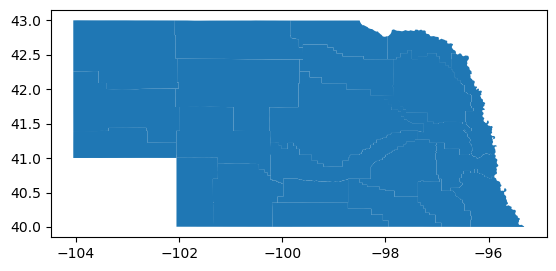

In [14]:
# plot shape info to map
gdfin1.plot()

In [15]:
# create output for Regulatory Area #1 dataframe
df = pd.DataFrame()

columnsList = ['in_ReportingUnitNativeID', 'geometry']
goutdf1 = pd.DataFrame(columns=columnsList, index=gdfin1.index)

goutdf1['in_ReportingUnitNativeID'] =  gdfin1["in_ReportingUnitNativeID"].astype(str)  #in_ReportingUnitNativeID needs to match source from above equivalent dataframe
goutdf1['geometry'] = gdfin1['in_Geometry']
goutdf1 = goutdf1.drop_duplicates().reset_index(drop=True)

# drop geometery from outdf
outdf = outdf.drop(['in_Geometry'], axis=1)


print(len(goutdf1))
goutdf1.head()

23


,in_ReportingUnitNativeID,geometry
0,ne23,"POLYGON ((-97.93460 40.00210, -98.17728 40.002..."
1,ne24,"POLYGON ((-98.72437 40.68977, -98.72389 40.451..."
2,ne5,"POLYGON ((-97.36873 40.43739, -97.36879 40.350..."
3,ne2,"POLYGON ((-96.74194 40.52312, -96.68493 40.523..."
4,ne11,"POLYGON ((-95.88707 40.72605, -95.88319 40.717..."


#### Overlay Area #2 shapefile info

In [16]:
# etc etc...

#### Concatenate goutdf shapefile info into single output

In [17]:
# Concatenate Geometry DataFrames
frames = [goutdf1] # add geoutdf dataframes here
goutdf = pd.concat(frames).reset_index(drop=True)

print(len(goutdf))
goutdf.head()

23


,in_ReportingUnitNativeID,geometry
0,ne23,"POLYGON ((-97.93460 40.00210, -98.17728 40.002..."
1,ne24,"POLYGON ((-98.72437 40.68977, -98.72389 40.451..."
2,ne5,"POLYGON ((-97.36873 40.43739, -97.36879 40.350..."
3,ne2,"POLYGON ((-96.74194 40.52312, -96.68493 40.523..."
4,ne11,"POLYGON ((-95.88707 40.72605, -95.88319 40.717..."


## Export Data

In [18]:
outdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23 entries, 0 to 22
Data columns (total 22 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   WaDEUUID                        23 non-null     object        
 1   in_Date                         23 non-null     object        
 2   in_Year                         23 non-null     object        
 3   in_OrganizationUUID             23 non-null     object        
 4   in_EPSGCodeCV                   23 non-null     object        
 5   in_ReportingUnitName            23 non-null     object        
 6   in_ReportingUnitNativeID        23 non-null     object        
 7   in_ReportingUnitProductVersion  23 non-null     object        
 8   in_ReportingUnitTypeCV          23 non-null     object        
 9   in_ReportingUnitUpdateDate      23 non-null     object        
 10  in_StateCV                      23 non-null     object        
 11  in_Overs

In [19]:
outdf

,WaDEUUID,in_Date,in_Year,in_OrganizationUUID,in_EPSGCodeCV,in_ReportingUnitName,in_ReportingUnitNativeID,in_ReportingUnitProductVersion,in_ReportingUnitTypeCV,in_ReportingUnitUpdateDate,in_StateCV,in_OversightAgency,in_RegulatoryDescription,in_RegulatoryName,in_RegulatoryOverlayNativeID,in_RegulatoryStatusCV,in_RegulatoryStatute,in_RegulatoryStatuteLink,in_StatutoryEffectiveDate,in_StatutoryEndDate,in_RegulatoryOverlayTypeCV,in_WaterSourceTypeCV
0,ov0,01/25/2025,2025,NEov_O1,4326,LOWER REPUBLICAN,ne23,,Natural Resources Districts,,NE,LOWER REPUBLICANNRD,Natural Resources Districts were created to so...,LOWER REPUBLICAN,23,Active,,https://www.lrnrd.org/,1972-01-01,,Natural Resources Districts,Groundwater
1,ov1,01/25/2025,2025,NEov_O1,4326,TRI-BASIN,ne24,,Natural Resources Districts,,NE,TRI-BASINNRD,Natural Resources Districts were created to so...,TRI-BASIN,24,Active,,https://www.tribasinnrd.org/,1972-01-01,,Natural Resources Districts,Groundwater
2,ov2,01/25/2025,2025,NEov_O1,4326,LITTLE BLUE,ne5,,Natural Resources Districts,,NE,LITTLE BLUENRD,Natural Resources Districts were created to so...,LITTLE BLUE,5,Active,,http://www.littlebluenrd.org/,1972-01-01,,Natural Resources Districts,Groundwater
3,ov3,01/25/2025,2025,NEov_O1,4326,LOWER BIG BLUE,ne2,,Natural Resources Districts,,NE,LOWER BIG BLUENRD,Natural Resources Districts were created to so...,LOWER BIG BLUE,2,Active,,http://www.lbbnrd.net,1972-01-01,,Natural Resources Districts,Groundwater
4,ov4,01/25/2025,2025,NEov_O1,4326,NEMAHA,ne11,,Natural Resources Districts,,NE,NEMAHANRD,Natural Resources Districts were created to so...,NEMAHA,11,Active,,https://www.nemahanrd.org/,1972-01-01,,Natural Resources Districts,Groundwater
5,ov5,01/25/2025,2025,NEov_O1,4326,MIDDLE REPUBLICAN,ne22,,Natural Resources Districts,,NE,MIDDLE REPUBLICANNRD,Natural Resources Districts were created to so...,MIDDLE REPUBLICAN,22,Active,,http://www.mrnrd.org,1972-01-01,,Natural Resources Districts,Groundwater
6,ov6,01/25/2025,2025,NEov_O1,4326,UPPER REPUBLICAN,ne21,,Natural Resources Districts,,NE,UPPER REPUBLICANNRD,Natural Resources Districts were created to so...,UPPER REPUBLICAN,21,Active,,http://www.urnrd.org,1972-01-01,,Natural Resources Districts,Groundwater
7,ov7,01/25/2025,2025,NEov_O1,4326,LOWER PLATTE SOUTH,ne20,,Natural Resources Districts,,NE,LOWER PLATTE SOUTHNRD,Natural Resources Districts were created to so...,LOWER PLATTE SOUTH,20,Active,,https://www.lpsnrd.org/,1972-01-01,,Natural Resources Districts,Groundwater
8,ov8,01/25/2025,2025,NEov_O1,4326,UPPER BIG BLUE,ne1,,Natural Resources Districts,,NE,UPPER BIG BLUENRD,Natural Resources Districts were created to so...,UPPER BIG BLUE,1,Active,,http://www.upperbigblue.org,1972-01-01,,Natural Resources Districts,Groundwater
9,ov9,01/25/2025,2025,NEov_O1,4326,CENTRAL PLATTE,ne18,,Natural Resources Districts,,NE,CENTRAL PLATTENRD,Natural Resources Districts were created to so...,CENTRAL PLATTE,18,Active,,www.cpnrd.org,1972-01-01,,Natural Resources Districts,Groundwater


In [20]:
goutdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23 entries, 0 to 22
Data columns (total 2 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   in_ReportingUnitNativeID  23 non-null     object  
 1   geometry                  23 non-null     geometry
dtypes: geometry(1), object(1)
memory usage: 500.0+ bytes


In [21]:
goutdf

,in_ReportingUnitNativeID,geometry
0,ne23,"POLYGON ((-97.93460 40.00210, -98.17728 40.002..."
1,ne24,"POLYGON ((-98.72437 40.68977, -98.72389 40.451..."
2,ne5,"POLYGON ((-97.36873 40.43739, -97.36879 40.350..."
3,ne2,"POLYGON ((-96.74194 40.52312, -96.68493 40.523..."
4,ne11,"POLYGON ((-95.88707 40.72605, -95.88319 40.717..."
5,ne22,"POLYGON ((-100.22341 40.74359, -100.22339 40.7..."
6,ne21,"POLYGON ((-101.24861 40.91565, -101.24842 40.8..."
7,ne20,"POLYGON ((-96.32542 41.05987, -96.31920 41.045..."
8,ne1,"POLYGON ((-97.00431 41.22004, -97.00470 41.191..."
9,ne18,"POLYGON ((-97.36806 41.26462, -97.42623 41.264..."


In [22]:
# Export out to CSV.
outdf.to_csv('RawInputData/Pov_Main.zip', compression=dict(method='zip', archive_name='Pov_Main.csv'), index=False)  # The output, save as a zip
goutdf.to_csv('RawInputData/P_Geometry.zip', compression=dict(method='zip', archive_name='P_Geometry.csv'), index=False)  # The output geometry.

In [24]:
tempdf = goutdf.copy()
tempdf = tempdf[tempdf['geometry'] == " " ]
tempdf

,in_ReportingUnitNativeID,geometry
